In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content
%cd drive
%cd My\ Drive
%cd PhD
%cd Paper_01

/content
/content/drive
/content/drive/My Drive
/content/drive/My Drive/PhD
/content/drive/My Drive/PhD/Paper_01


In [3]:
from utils.spider_connectors import * 

In [4]:
ru_spider = RuSpiderDB()
en_spider = EnSpiderDB()

In [5]:
import json
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import os

In [6]:
%matplotlib inline 

# English

Loading

In [7]:
with open('datasets/araneae/araneae.json') as json_file:
  english = json.load(json_file)
print(len(english))

9693


In [8]:
sources = set([_r['source'] for _r in english])
sources

{'other-train', 'spider-dev', 'spider-train'}

In [35]:
english_amount = len(english)
english_amount

9693

Tokens amount

In [36]:
tokens_all_length = [len(_sample['question_toks']) for _sample in english]
tokens_length_frequency = collections.Counter(tokens_all_length)

In [42]:
englis_tokens = {k:v/english_amount for k, v in tokens_length_frequency.items()}

In [10]:
max_tokens = max(tokens_all_length)
min_tokens = min(tokens_all_length)
mean_tokens = np.mean(tokens_all_length)
median_tokens = np.median(tokens_all_length)
print(f'max_tokens = {max_tokens}')
print(f'min_tokens = {min_tokens}')
print(f'mean_tokens = {mean_tokens}')
print(f'median_tokens = {median_tokens}')

max_tokens = 44
min_tokens = 1
mean_tokens = 13.287217579696689
median_tokens = 13.0


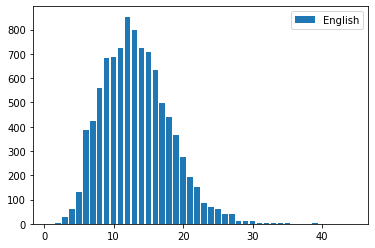

In [11]:
plt.bar(tokens_length_frequency.keys(), tokens_length_frequency.values(), label='English')
plt.legend(loc='upper right')
plt.show()

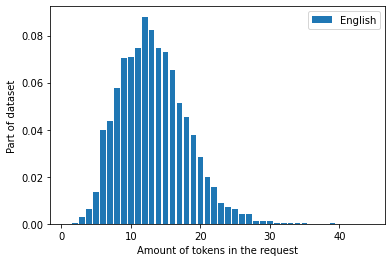

In [60]:
plt.bar(englis_tokens.keys(), englis_tokens.values(), label='English')
plt.legend(loc='upper right')
plt.xlabel("Amount of tokens in the request")
plt.ylabel("Part of dataset")
plt.show()

Symbols amount

In [44]:
symbols_all_length = [len(_sample['question']) for _sample in english]
symbols_length_frequency = collections.Counter(symbols_all_length)

In [45]:
englis_symbols = {k:v/english_amount for k, v in symbols_length_frequency.items()}

In [13]:
max_tokens = max(symbols_all_length)
min_tokens = min(symbols_all_length)
mean_tokens = np.mean(symbols_all_length)
median_tokens = np.median(symbols_all_length)
print(f'max_tokens = {max_tokens}')
print(f'min_tokens = {min_tokens}')
print(f'mean_tokens = {mean_tokens}')
print(f'median_tokens = {median_tokens}')

max_tokens = 224
min_tokens = 3
mean_tokens = 66.74785927989271
median_tokens = 64.0


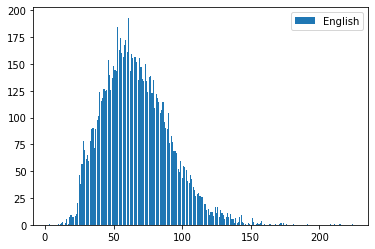

In [14]:
plt.bar(symbols_length_frequency.keys(), symbols_length_frequency.values(), label='English')
plt.legend(loc='upper right')
plt.show()

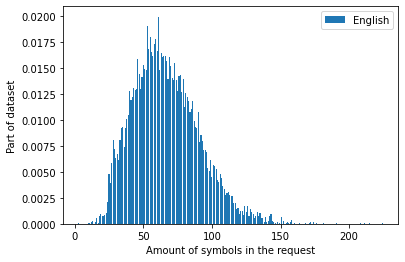

In [61]:
plt.bar(englis_symbols.keys(), englis_symbols.values(), label='English')
plt.legend(loc='upper right')
plt.xlabel("Amount of symbols in the request")
plt.ylabel("Part of dataset")
plt.show()

# Russian

Loading

In [15]:
sheet_id = "1TqB7RPKSEargTovnPOL6F_gnvGJfpUP14Ie9jMluDN4"
sheet_name = "requests"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
russian_basic = pd.read_csv(url, sep=',')
len(russian_basic)

1807

In [16]:
sheet_id = "1UACkWT7kZmfBM5lvN5iKkRSJlisAMisPxVEQk2sr7qk"
sheet_name = "to_add"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
russian_binary = pd.read_csv(url, sep=',')
len(russian_binary)

52

In [17]:
sheet_id = "1RB6kPjLUAb9Cg_5gsQx7ccrmMOC_g3XaY48q0RcHWNk"
sheet_name = "to_add"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
russian_dates = pd.read_csv(url, sep=',')
len(russian_dates)

50

In [18]:
sheet_id = "1yRZBRAi0fWXb1inRMeBAP-X15XL8b3jDDoWUGytdI9g"
sheet_name = "to_add"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
russian_fuzzy = pd.read_csv(url, sep=',')
len(russian_fuzzy)

53

In [19]:
russian_fuzzy.head()

,id,"Add to DB (db, table, rows = [{column: row}])",en,ru,en_sql,ru_sql,db_id,source,type,tag,comments,сhecked,corrected_en,corrected_ru,corrected_en_sql,corrected_ru_sql
0,f-1,NaN,Correspondence between IDs and names of airports,Как соответсвуют идентификаторы и названия аэр...,"SELECT Airport_ID, Airport_Name FROM airport","SELECT Airport_ID, Airport_Name FROM airport",aircraft,train,fuzzy,"overlapping_homo, columns",NaN,NaN,NaN,NaN,NaN,NaN
1,f-2,NaN,"Show me, please, winning pilots and their airc...","Покажите мне, пожалуйста, победивших пилотов и...","SELECT Winning_Pilot, Winning_Aircraft FROM match","SELECT Winning_Pilot, Winning_Aircraft FROM match",aircraft,train,fuzzy,"overlapping_homo, columns",NaN,NaN,NaN,NaN,NaN,NaN
2,f-3,"('aircraft', 'airport', 'Airport_Name', 'Airpo...","How many international, domestic and transit p...","Сколько всего пассажиров на международных, вну...","SELECT SUM(International_Passengers), SUM(Dome...","SELECT SUM(International_Passengers), SUM(Dome...",aircraft,train,fuzzy,"overlapping_homo, columns",Values,NaN,NaN,NaN,NaN,NaN
3,f-4,NaN,Show all names and surnames of our customers,Показать все имена и фамилии наших клиентов,"SELECT first_name, last_name FROM Customers","SELECT first_name, last_name FROM Customers",products_for_hire,train,fuzzy,"synonyms, columns",NaN,NaN,NaN,NaN,NaN,NaN
4,f-5,NaN,How many students have an allergy to milk?,Сколько студентов страдают аллергией на помидоры?,SELECT COUNT(*) FROM Has_Allergy WHERE Allergy...,SELECT COUNT(*) FROM Has_Allergy WHERE Allergy...,allergy_1,train,fuzzy,"overlapping_hetero, tables, columns",Values,NaN,NaN,NaN,NaN,NaN


In [20]:
russian_basic.shape

(1807, 7)

In [21]:
russian = pd.concat([russian_basic, russian_binary, russian_dates, russian_fuzzy], axis=0)

In [47]:
russian_amount = len(russian)
russian_amount

1962

In [22]:
russian.shape

(1962, 20)

Only basic

In [23]:
symbols_length = [len(r['ru']) for i, r in russian_basic.iterrows()]
tokens_length = [len(r['ru'].split()) for i, r in russian_basic.iterrows()]

In [24]:
symbols_counter = collections.Counter(symbols_length)
tokens_counter = collections.Counter(tokens_length)

In [25]:
max_tokens = max(tokens_length)
min_tokens = min(tokens_length)
mean_tokens = np.mean(tokens_length)
median_tokens = np.median(tokens_length)
print(f'max_tokens = {max_tokens}')
print(f'min_tokens = {min_tokens}')
print(f'mean_tokens = {mean_tokens}')
print(f'median_tokens = {median_tokens}')

max_tokens = 31
min_tokens = 2
mean_tokens = 9.410625345877145
median_tokens = 9.0


In [26]:
max_tokens = max(symbols_length)
min_tokens = min(symbols_length)
mean_tokens = np.mean(symbols_length)
median_tokens = np.median(symbols_length)
print(f'max_tokens = {max_tokens}')
print(f'min_tokens = {min_tokens}')
print(f'mean_tokens = {mean_tokens}')
print(f'median_tokens = {median_tokens}')

max_tokens = 206
min_tokens = 14
mean_tokens = 67.6513558384062
median_tokens = 65.0


In [31]:
symbols_counter

Counter({14: 1,
         15: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 4,
         22: 2,
         23: 1,
         24: 1,
         25: 2,
         26: 5,
         27: 5,
         28: 5,
         29: 10,
         30: 10,
         31: 4,
         32: 13,
         33: 12,
         34: 9,
         35: 16,
         36: 10,
         37: 19,
         38: 24,
         39: 15,
         40: 16,
         41: 23,
         42: 30,
         43: 19,
         44: 27,
         45: 38,
         46: 28,
         47: 20,
         48: 32,
         49: 34,
         50: 26,
         51: 32,
         52: 28,
         53: 22,
         54: 24,
         55: 31,
         56: 29,
         57: 32,
         58: 35,
         59: 41,
         60: 29,
         61: 35,
         62: 29,
         63: 35,
         64: 23,
         65: 28,
         66: 33,
         67: 27,
         68: 31,
         69: 33,
         70: 29,
         71: 28,
         72: 32,
         73: 27,
         74: 27,
         75:

<BarContainer object of 133 artists>

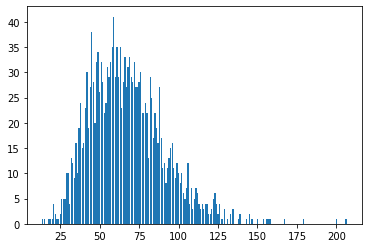

In [32]:
plt.bar(symbols_counter.keys(), symbols_counter.values())

In [28]:
x_symbols = sorted(list(set(list(symbols_counter.keys()) + list(all_symbols_counter.keys()))))

NameError: ignored

In [29]:
plt.hist(symbols_counter.values(), x_symbols, alpha=0.5, label='English')
plt.hist(all_symbols_counter.values(), x_symbols, alpha=0.5, label='Russian')
plt.legend(loc='upper right')
plt.show()

NameError: ignored

In [30]:
x_tokens = sorted(list(set(list(tokens_counter.keys()) + list(all_tokens_counter.keys()))))
plt.hist(tokens_counter.values(), x_tokens, alpha=0.5, label='English')
plt.hist(all_tokens_counter.values(), x_tokens, alpha=0.5, label='Russian')
plt.legend(loc='upper right')
plt.show()

NameError: ignored

In [ ]:
plt.bar(tokens_counter.keys(), tokens_counter.values())

All russian

In [48]:
all_symbols_length = [len(r['ru']) for i, r in russian.iterrows()]
all_tokens_length = [len(r['ru'].split()) for i, r in russian.iterrows()]

In [50]:
all_symbols_counter = collections.Counter(all_symbols_length)
all_tokens_counter = collections.Counter(all_tokens_length)

In [51]:
russian_symbols = {k:v/russian_amount for k, v in all_symbols_counter.items()}
russian_tokens = {k:v/russian_amount for k, v in all_tokens_counter.items()}

In [52]:
max_tokens = max(all_tokens_length)
min_tokens = min(all_tokens_length)
mean_tokens = np.mean(all_tokens_length)
median_tokens = np.median(all_tokens_length)
print(f'max_tokens = {max_tokens}')
print(f'min_tokens = {min_tokens}')
print(f'mean_tokens = {mean_tokens}')
print(f'median_tokens = {median_tokens}')

max_tokens = 31
min_tokens = 2
mean_tokens = 9.275229357798166
median_tokens = 9.0


In [53]:
max_tokens = max(all_symbols_length)
min_tokens = min(all_symbols_length)
mean_tokens = np.mean(all_symbols_length)
median_tokens = np.median(all_symbols_length)
print(f'max_tokens = {max_tokens}')
print(f'min_tokens = {min_tokens}')
print(f'mean_tokens = {mean_tokens}')
print(f'median_tokens = {median_tokens}')

max_tokens = 206
min_tokens = 14
mean_tokens = 66.55606523955147
median_tokens = 64.0


In [ ]:
plt.bar(all_symbols_counter.keys(), all_symbols_counter.values(), label='Russian', color = "maroon")
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.bar(all_tokens_counter.keys(), all_tokens_counter.values(), label='Russian', color = "maroon")
plt.legend(loc='upper right')
plt.show()

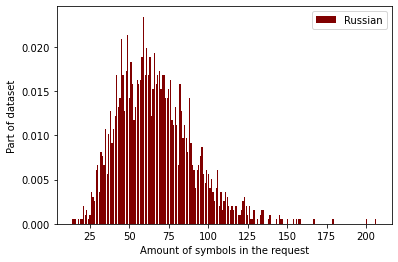

In [62]:
plt.bar(russian_symbols.keys(), russian_symbols.values(), label='Russian', color = "maroon")
plt.legend(loc='upper right')
plt.xlabel("Amount of symbols in the request")
plt.ylabel("Part of dataset")
plt.show()

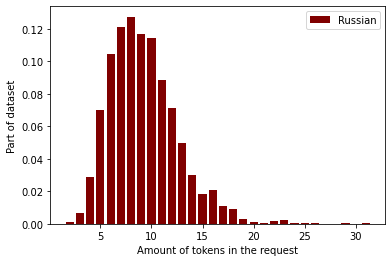

In [63]:
plt.bar(russian_tokens.keys(), russian_tokens.values(), label='Russian', color = "maroon")
plt.legend(loc='upper right')
plt.xlabel("Amount of tokens in the request")
plt.ylabel("Part of dataset")
plt.show()